<a href="https://colab.research.google.com/github/rhiats/pimaDiab/blob/main/pima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

**Load Data**

In [28]:
df=pd.read_csv("/content/drive/MyDrive/assignments/Spring24/Spec Project/diabetes.csv")
df.insert(0, 'ID', range(0, len(df)))
df.head()
df.astype(int)
df['Outcome'] = np.where(df['Outcome']==0, 'Healthy', 'Diabetic')

In [11]:
df.columns[:-1]

Index(['ID', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

**Class Balance**

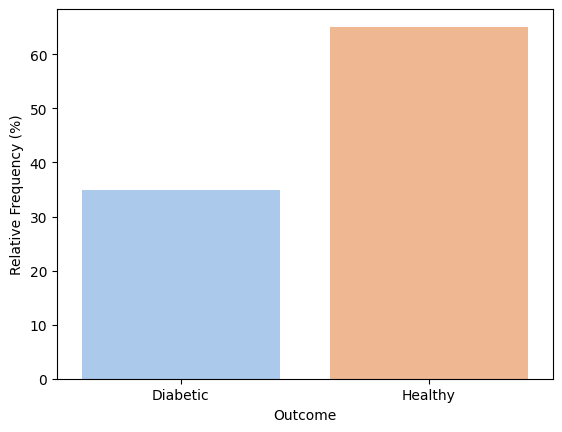

In [3]:
def balanced(df):
  """
    Percentage of passengers with Diabetes and those without Diabetes
    Balanced or Imbalanced Data

    @p:
      df (dataframe): Input dataframe
  """

  ratio_df=(df[['ID','Outcome']].groupby('Outcome').count()/df.shape[0])*100

  ratio_df.reset_index(inplace=True)

  ratio_df.rename(columns={"ID": "Relative Frequency (%)"}, inplace=True)

  sns.barplot(data=ratio_df, x='Outcome', y="Relative Frequency (%)", palette="pastel")

  plt.savefig("/content/drive/MyDrive/assignments/Spring24/Spec Project/output/balanced.png")

balanced(df)

**PCA**

Based on the loadings the top three important features are Insulin, Glucose, and SkinThickness to predict the likelihood of Diabetes. The first component explains 94% of the variance in the data.

It may be beneficial to normalize the data to minimize the influence of any outliers on the analysis.

Reference:

https://www.datacamp.com/tutorial/principal-component-analysis-in-python

https://scentellegher.github.io/machine-learning/2020/01/27/pca-loadings-sklearn.html

https://stats.stackexchange.com/questions/27300/using-principal-component-analysis-pca-for-feature-selection

In [21]:
pca = PCA(n_components=2)
X=df.to_numpy()
X=X[:,1:-1]
X = pca.fit_transform(X)

In [27]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.93517697 0.06482303]


In [23]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1','PC2'], index=df.columns[1:-1])
loadings.sort_values(by=['PC1'], ascending=False)

,PC1,PC2
Insulin,0.993111,0.094627
Glucose,0.097812,-0.972210
SkinThickness,0.060757,0.057861
BloodPressure,0.016093,-0.141909
BMI,0.014011,-0.046973
DiabetesPedigreeFunction,0.000537,-0.000817
Pregnancies,-0.002022,-0.022649
Age,-0.003565,-0.140168


**Project Instances for Visualization**

In [39]:
principalComponents_arr = pca.fit_transform(X)
principalComponents_df= pd.DataFrame(principalComponents_arr, columns = ['PC1','PC2'])

<Figure size 640x480 with 0 Axes>

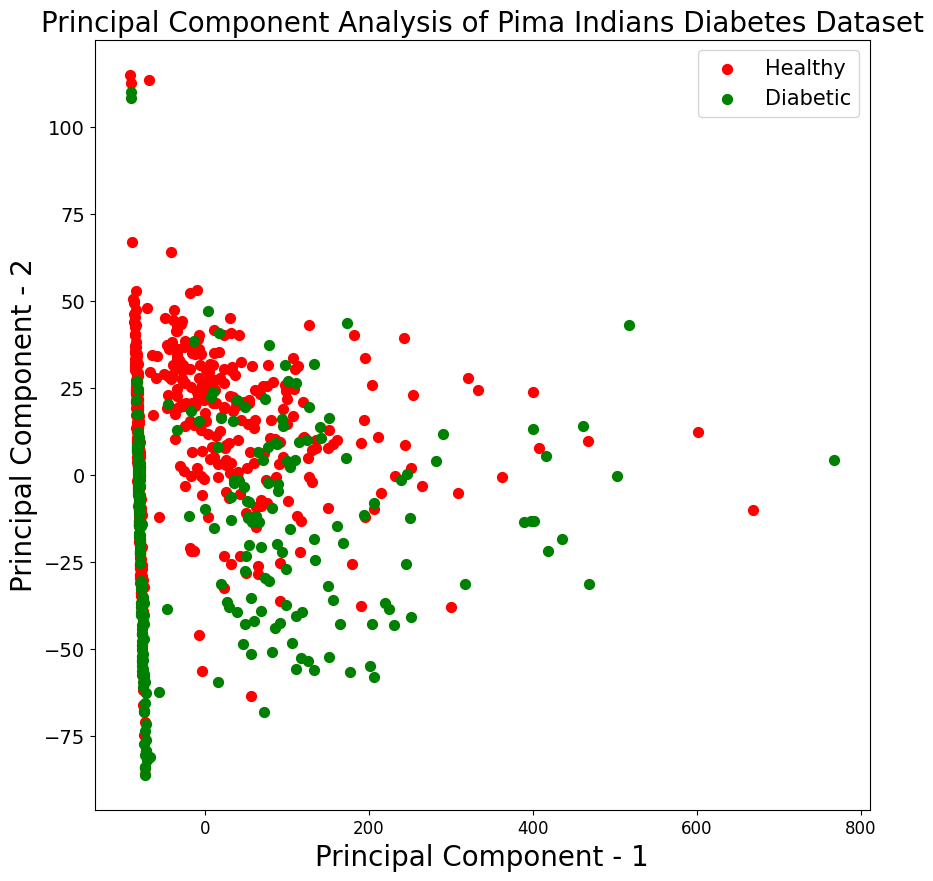

In [41]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Pima Indians Diabetes Dataset",fontsize=20)
targets = ['Healthy', 'Diabetic']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    df_target=df[df['Outcome'] == target]
    indicesToKeep=df_target.index
    plt.scatter(principalComponents_df.loc[indicesToKeep, 'PC1'] , principalComponents_df.loc[indicesToKeep, 'PC2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.savefig("/content/drive/MyDrive/assignments/Spring24/Spec Project/output/pca.png")

**Conditional Probability**

- Liklihood Someone is Overweight given that they are Diabetic